Directorio actual: C:\Users\bravo\Documents\Metodos Numericos Pycharm\Gauss
Existe src? True
Contenido de src: ['iterative_methods.py', 'linear_sist_methods.py', '__init__.py', '__pycache__']
[07-15 19:46:44][INFO] 2025-07-15 19:46:44.578180
[07-15 19:46:44][INFO] i= 0 x: [0. 0.]
[07-15 19:46:44][INFO] i= 1 x: [[7. 0.]]
[07-15 19:46:44][INFO] i= 2 x: [[7.  2.8]]
[07-15 19:46:44][INFO] i= 3 x: [[4.2 2.8]]
[07-15 19:46:44][INFO] i= 4 x: [[4.2  1.68]]
[07-15 19:46:44][INFO] i= 5 x: [[5.32 1.68]]
[07-15 19:46:44][INFO] i= 6 x: [[5.32  2.128]]
[07-15 19:46:44][INFO] i= 7 x: [[4.872 2.128]]
[07-15 19:46:44][INFO] i= 8 x: [[4.872  1.9488]]
[07-15 19:46:44][INFO] i= 9 x: [[5.0512 1.9488]]
[07-15 19:46:44][INFO] i= 10 x: [[5.0512  2.02048]]
[07-15 19:46:44][INFO] i= 11 x: [[4.97952 2.02048]]
[07-15 19:46:44][INFO] i= 12 x: [[4.97952  1.991808]]
[07-15 19:46:44][INFO] i= 13 x: [[5.008192 1.991808]]
[07-15 19:46:44][INFO] i= 14 x: [[5.008192  2.0032768]]
[07-15 19:46:44][INFO] i= 15 x: [[4.996723

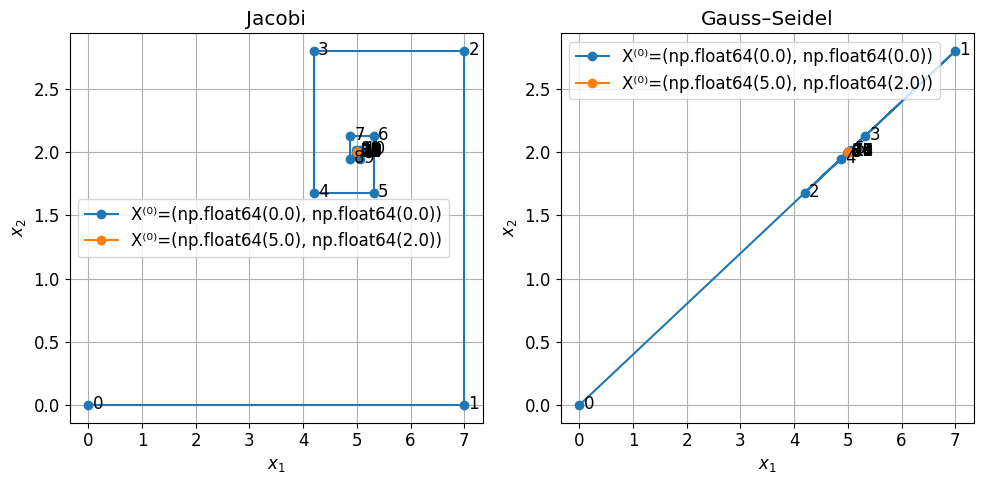

Guardando animaciones...
[07-15 19:46:45][INFO] Animation.save using <class 'matplotlib.animation.PillowWriter'>
[07-15 19:46:46][INFO] Animation.save using <class 'matplotlib.animation.PillowWriter'>
Animación Método Jacobi:


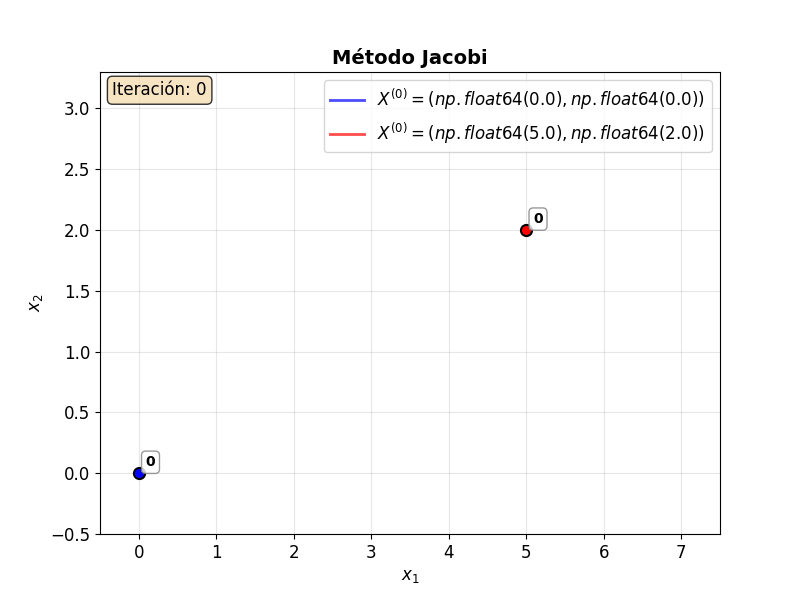


Animación Método Gauss-Seidel:


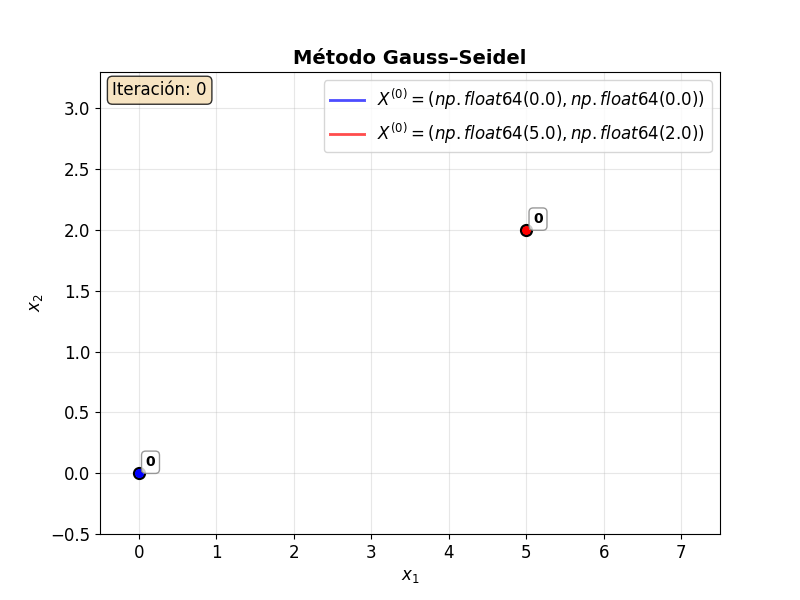

Animaciones creadas exitosamente!
Creando animaciones con zoom...
Creando animaciones de iteraciones finales...
Guardando animaciones con zoom...
[07-15 19:46:47][INFO] Animation.save using <class 'matplotlib.animation.PillowWriter'>
[07-15 19:46:49][INFO] Animation.save using <class 'matplotlib.animation.PillowWriter'>
[07-15 19:46:50][INFO] Animation.save using <class 'matplotlib.animation.PillowWriter'>
[07-15 19:46:51][INFO] Animation.save using <class 'matplotlib.animation.PillowWriter'>
Animación Jacobi con Zoom:


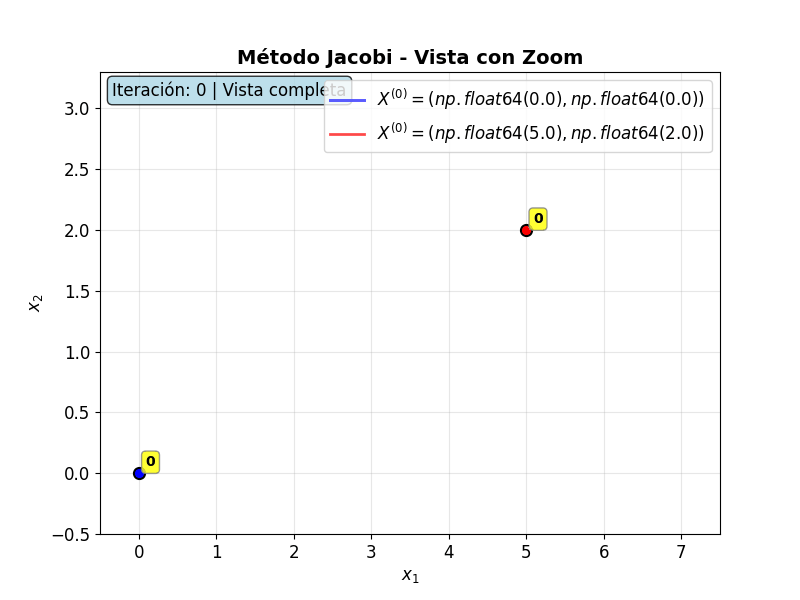


Animación Gauss-Seidel con Zoom:


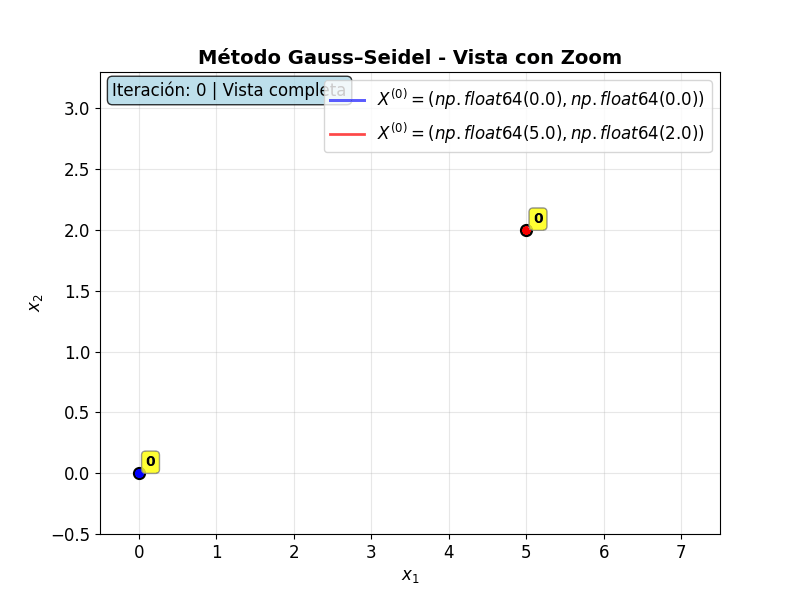


Últimas iteraciones - Jacobi:


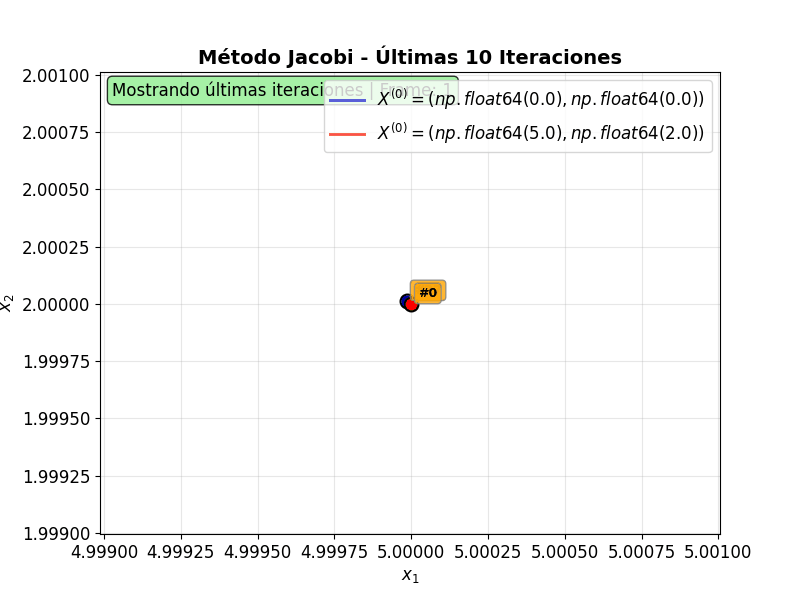


Últimas iteraciones - Gauss-Seidel:


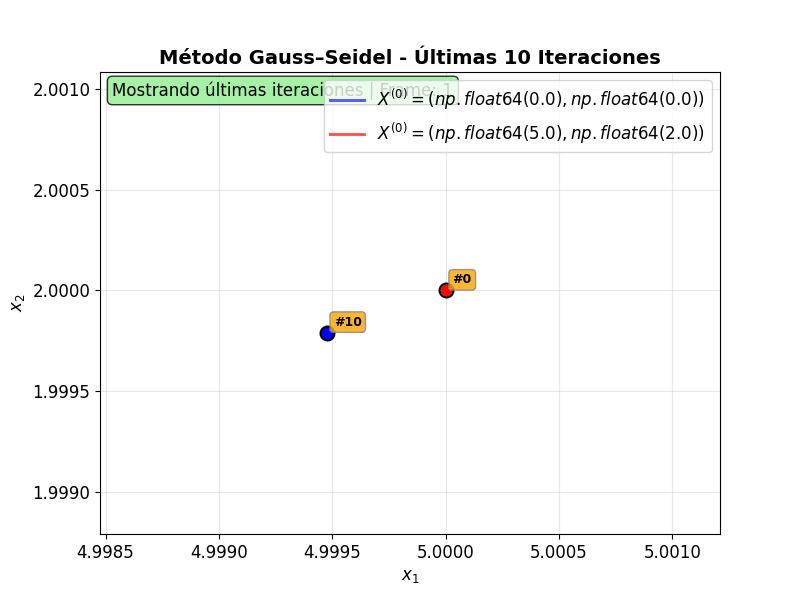

Animaciones con zoom creadas exitosamente!


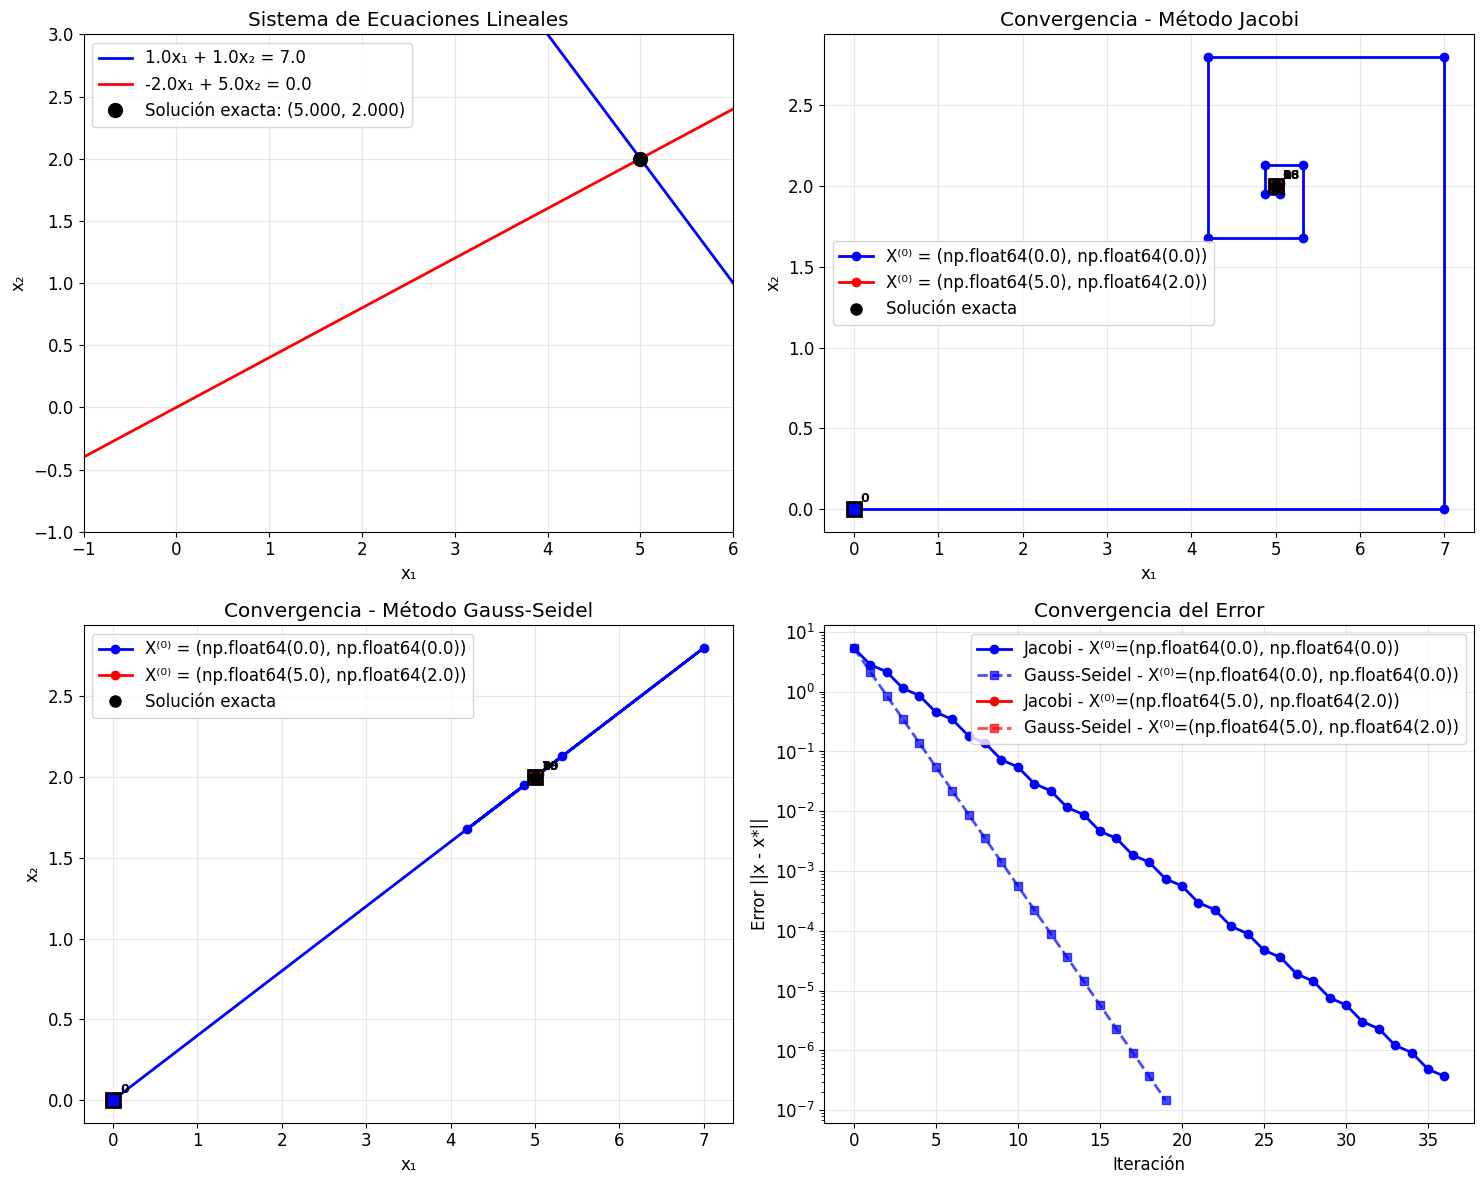

INFORMACIÓN DEL SISTEMA
Matriz A:
[[ 1.  1.]
 [-2.  5.]]

Vector b: [7. 0.]
Solución exacta: [5.000000, 2.000000]
Determinante de A: 7.000000
Número de condición: 4.189902

INFORMACIÓN DE CONVERGENCIA

Punto inicial 1: (np.float64(0.0), np.float64(0.0))
  Jacobi: 37 iteraciones, error final: 3.70e-07
  Gauss-Seidel: 20 iteraciones, error final: 1.48e-07
  → Gauss-Seidel converge 17 iteraciones más rápido

Punto inicial 2: (np.float64(5.0), np.float64(2.0))
  Jacobi: 3 iteraciones, error final: 0.00e+00
  Gauss-Seidel: 3 iteraciones, error final: 0.00e+00
  → Ambos métodos convergen en el mismo número de iteraciones


In [1]:
%load_ext autoreload
%autoreload 2
import os

print("Directorio actual:", os.getcwd())
print("Existe src?", os.path.exists('src'))
print("Contenido de src:", os.listdir('src') if os.path.exists('src') else "No existe")
import os, sys

sys.path.insert(0, os.path.abspath('src'))

import numpy as np
import matplotlib.pyplot as plt
%autoreload 2
# Importación absoluta en lugar de relativa
from src import gauss_jacobi, gauss_seidel

# Ajustes de estilo
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 12

# Matriz de coeficientes y término independiente
A = np.array([[1.0, 1.0],
              [-2.0, 5.0]])
b = np.array([7.0, 0.0])

# Tolerancia y número máximo de iteraciones
tol = 1e-6
max_iter = 50

# Vectores iniciales (columna)
x0_list = [np.array([0.0, 0.0]),
           np.array([5.0, 2.0])]

traj_jacobi = []
traj_seidel = []

for x0 in x0_list:
    # Jacobi
    xj, tray_j = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
    # Convertimos cada iteración a vector columna y agregamos la solución final
    tray_j_vectors = [iter_x.reshape(-1, 1) if iter_x.ndim == 1 else iter_x for iter_x in tray_j]
    tray_j_full = tray_j_vectors + [xj.reshape(-1, 1)]
    # Concatenamos horizontalmente y transponemos
    traj_jacobi.append(np.hstack(tray_j_full).T)

    # Gauss–Seidel
    xs, tray_s = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)
    # Convertimos cada iteración a vector columna y agregamos la solución final
    tray_s_vectors = [iter_x.reshape(-1, 1) if iter_x.ndim == 1 else iter_x for iter_x in tray_s]
    tray_s_full = tray_s_vectors + [xs.reshape(-1, 1)]
    traj_seidel.append(np.hstack(tray_s_full).T)
fig, axes = plt.subplots(1, 2)

for ax, (name, trajs) in zip(axes, [('Jacobi', traj_jacobi),
                                    ('Gauss–Seidel', traj_seidel)]):
    for x0, traj in zip(x0_list, trajs):
        xs, ys = traj[:, 0], traj[:, 1]
        ax.plot(xs, ys, marker='o', label=f'X⁽⁰⁾={tuple(x0)}')
        # anotamos el número de iteración en cada punto
        for k, (xi, yi) in enumerate(zip(xs, ys)):
            ax.annotate(str(k), (xi, yi), textcoords="offset points", xytext=(3, -3))
    ax.set_title(name)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display


def create_method_animation(method_name, trajs, x0_list, interval=500):
    """
    Crea una animación que muestra las iteraciones de un método específico.
    """
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'purple']

    # Límites globales
    all_x = np.hstack([t[:, 0] for t in trajs])
    all_y = np.hstack([t[:, 1] for t in trajs])
    m = 0.5
    ax.set_xlim(all_x.min() - m, all_x.max() + m)
    ax.set_ylim(all_y.min() - m, all_y.max() + m)

    # Crear líneas y puntos
    lines, points = [], []
    for i, (x0, traj) in enumerate(zip(x0_list, trajs)):
        color = colors[i % len(colors)]
        line, = ax.plot([], [], color=color, lw=2, alpha=0.7,
                        label=f'$X^{{(0)}}={tuple(x0)}$')
        point, = ax.plot([], [], 'o', color=color, ms=8,
                         markeredgecolor='black', mew=1.5)
        lines.append(line)
        points.append(point)

    ax.set_title(f'Método {method_name}', fontsize=14, fontweight='bold')
    ax.set_xlabel('$x_1$', fontsize=12)
    ax.set_ylabel('$x_2$', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right')

    iter_text = ax.text(0.02, 0.98, '', transform=ax.transAxes,
                        va='top', fontsize=12,
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    def animate(k):
        # Limpiar anotaciones previas (excepto iter_text)
        for txt in ax.texts[1:]:
            txt.remove()

        # Actualizar cada trayectoria
        for i, traj in enumerate(trajs):
            xs, ys = traj[:, 0], traj[:, 1]
            n = len(xs)
            idx = min(k, n - 1)

            # Actualizar línea y punto
            lines[i].set_data(xs[:idx + 1], ys[:idx + 1])
            points[i].set_data([xs[idx]], [ys[idx]])

            # Anotación de la iteración actual
            ax.annotate(str(idx), (xs[idx], ys[idx]),
                        textcoords='offset points', xytext=(5, 5),
                        fontsize=10, weight='bold',
                        bbox=dict(boxstyle='round,pad=0.3',
                                  facecolor='white', alpha=0.8,
                                  edgecolor='gray'))

        iter_text.set_text(f'Iteración: {k}')

        # Sin blit, no necesitamos retornar nada específico
        return []

    n_frames = max(len(t) for t in trajs)
    anim = FuncAnimation(fig, animate, frames=n_frames,
                         interval=interval, repeat=True, blit=False)

    return anim, fig


# Crear las animaciones
anim_jacobi, fig_jacobi = create_method_animation('Jacobi', traj_jacobi, x0_list, interval=800)
anim_seidel, fig_seidel = create_method_animation('Gauss–Seidel', traj_seidel, x0_list, interval=800)

# Guardar como GIF
print("Guardando animaciones...")
anim_jacobi.save('jacobi_animation.gif', writer='pillow', fps=1.5, dpi=100)
anim_seidel.save('seidel_animation.gif', writer='pillow', fps=1.5, dpi=100)

# Mostrar los GIFs
print("Animación Método Jacobi:")
display(Image(filename='jacobi_animation.gif'))

print("\nAnimación Método Gauss-Seidel:")
display(Image(filename='seidel_animation.gif'))

# Cerrar figuras para liberar memoria
plt.close(fig_jacobi)
plt.close(fig_seidel)
print("Animaciones creadas exitosamente!")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display


def create_zoom_animation(method_name, trajs, x0_list, interval=500, zoom_factor=0.1):
    """
    Crea una animación con zoom dinámico que se enfoca en las iteraciones finales.
    """
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'purple']

    # Calcular el punto de convergencia (promedio de los puntos finales)
    final_points = [traj[-1] for traj in trajs]
    convergence_point = np.mean(final_points, axis=0)

    # Crear líneas y puntos
    lines, points = [], []
    for i, (x0, traj) in enumerate(zip(x0_list, trajs)):
        color = colors[i % len(colors)]
        line, = ax.plot([], [], color=color, lw=2, alpha=0.7,
                        label=f'$X^{{(0)}}={tuple(x0)}$')
        point, = ax.plot([], [], 'o', color=color, ms=8,
                         markeredgecolor='black', mew=1.5)
        lines.append(line)
        points.append(point)

    ax.set_title(f'Método {method_name} - Vista con Zoom', fontsize=14, fontweight='bold')
    ax.set_xlabel('$x_1$', fontsize=12)
    ax.set_ylabel('$x_2$', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right')

    iter_text = ax.text(0.02, 0.98, '', transform=ax.transAxes,
                        va='top', fontsize=12,
                        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

    def animate(k):
        # Limpiar anotaciones previas
        for txt in ax.texts[1:]:
            txt.remove()

        # Determinar el rango de zoom basado en la iteración actual
        max_frames = max(len(t) for t in trajs)
        zoom_progress = k / max_frames

        # Calcular límites dinámicos
        if zoom_progress < 0.3:
            # Vista inicial amplia
            all_x = np.hstack([t[:, 0] for t in trajs])
            all_y = np.hstack([t[:, 1] for t in trajs])
            margin = 0.5
            xlim = [all_x.min() - margin, all_x.max() + margin]
            ylim = [all_y.min() - margin, all_y.max() + margin]
        else:
            # Zoom progresivo hacia la solución
            zoom_intensity = (zoom_progress - 0.3) / 0.7  # Normalizar entre 0 y 1
            current_range = zoom_factor * (1 - zoom_intensity) + 0.01 * zoom_intensity

            xlim = [convergence_point[0] - current_range, convergence_point[0] + current_range]
            ylim = [convergence_point[1] - current_range, convergence_point[1] + current_range]

        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

        # Actualizar cada trayectoria
        for i, traj in enumerate(trajs):
            xs, ys = traj[:, 0], traj[:, 1]
            n = len(xs)
            idx = min(k, n - 1)

            # Actualizar línea y punto
            lines[i].set_data(xs[:idx + 1], ys[:idx + 1])
            points[i].set_data([xs[idx]], [ys[idx]])

            # Anotación de la iteración actual
            ax.annotate(str(idx), (xs[idx], ys[idx]),
                        textcoords='offset points', xytext=(5, 5),
                        fontsize=10, weight='bold',
                        bbox=dict(boxstyle='round,pad=0.3',
                                  facecolor='yellow', alpha=0.8,
                                  edgecolor='gray'))

        zoom_level = f"Zoom: {zoom_progress:.1%}" if zoom_progress > 0.3 else "Vista completa"
        iter_text.set_text(f'Iteración: {k} | {zoom_level}')

        return []

    n_frames = max(len(t) for t in trajs)
    anim = FuncAnimation(fig, animate, frames=n_frames,
                         interval=interval, repeat=True, blit=False)

    return anim, fig


def create_final_iterations_animation(method_name, trajs, x0_list, interval=400, last_n=10):
    """
    Crea una animación que muestra solo las últimas n iteraciones con zoom extremo.
    """
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'purple']

    # Obtener las últimas n iteraciones de cada trayectoria
    final_trajs = [traj[-last_n:] if len(traj) > last_n else traj for traj in trajs]

    # Calcular límites para las iteraciones finales
    all_final_x = np.hstack([t[:, 0] for t in final_trajs])
    all_final_y = np.hstack([t[:, 1] for t in final_trajs])

    margin = max(0.001, (all_final_x.max() - all_final_x.min()) * 0.1)
    ax.set_xlim(all_final_x.min() - margin, all_final_x.max() + margin)
    ax.set_ylim(all_final_y.min() - margin, all_final_y.max() + margin)

    # Crear líneas y puntos
    lines, points = [], []
    for i, (x0, traj) in enumerate(zip(x0_list, final_trajs)):
        color = colors[i % len(colors)]
        line, = ax.plot([], [], color=color, lw=2, alpha=0.7,
                        label=f'$X^{{(0)}}={tuple(x0_list[i])}$')
        point, = ax.plot([], [], 'o', color=color, ms=10,
                         markeredgecolor='black', mew=1.5)
        lines.append(line)
        points.append(point)

    ax.set_title(f'Método {method_name} - Últimas {last_n} Iteraciones',
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('$x_1$', fontsize=12)
    ax.set_ylabel('$x_2$', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right')

    iter_text = ax.text(0.02, 0.98, '', transform=ax.transAxes,
                        va='top', fontsize=12,
                        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

    def animate(k):
        # Limpiar anotaciones previas
        for txt in ax.texts[1:]:
            txt.remove()

        # Actualizar cada trayectoria
        for i, traj in enumerate(final_trajs):
            xs, ys = traj[:, 0], traj[:, 1]
            n = len(xs)
            idx = min(k, n - 1)

            # Actualizar línea y punto
            lines[i].set_data(xs[:idx + 1], ys[:idx + 1])
            points[i].set_data([xs[idx]], [ys[idx]])

            # Anotación con el número de iteración real
            real_iter = len(trajs[i]) - len(traj) + idx
            ax.annotate(f'#{real_iter}', (xs[idx], ys[idx]),
                        textcoords='offset points', xytext=(5, 5),
                        fontsize=9, weight='bold',
                        bbox=dict(boxstyle='round,pad=0.3',
                                  facecolor='orange', alpha=0.8,
                                  edgecolor='gray'))

        iter_text.set_text(f'Mostrando últimas iteraciones | Frame: {k + 1}')

        return []

    n_frames = max(len(t) for t in final_trajs)
    anim = FuncAnimation(fig, animate, frames=n_frames,
                         interval=interval, repeat=True, blit=False)

    return anim, fig


# Crear las animaciones con zoom
print("Creando animaciones con zoom...")
anim_jacobi_zoom, fig_jacobi_zoom = create_zoom_animation('Jacobi', traj_jacobi, x0_list, interval=600)
anim_seidel_zoom, fig_seidel_zoom = create_zoom_animation('Gauss–Seidel', traj_seidel, x0_list, interval=600)

# Crear las animaciones de iteraciones finales
print("Creando animaciones de iteraciones finales...")
anim_jacobi_final, fig_jacobi_final = create_final_iterations_animation('Jacobi', traj_jacobi, x0_list, interval=500)
anim_seidel_final, fig_seidel_final = create_final_iterations_animation('Gauss–Seidel', traj_seidel, x0_list,
                                                                        interval=500)

# Guardar como GIF
print("Guardando animaciones con zoom...")
anim_jacobi_zoom.save('jacobi_zoom.gif', writer='pillow', fps=2, dpi=100)
anim_seidel_zoom.save('seidel_zoom.gif', writer='pillow', fps=2, dpi=100)

anim_jacobi_final.save('jacobi_final.gif', writer='pillow', fps=2.5, dpi=100)
anim_seidel_final.save('seidel_final.gif', writer='pillow', fps=2.5, dpi=100)

# Mostrar los GIFs
print("Animación Jacobi con Zoom:")
display(Image(filename='jacobi_zoom.gif'))

print("\nAnimación Gauss-Seidel con Zoom:")
display(Image(filename='seidel_zoom.gif'))

print("\nÚltimas iteraciones - Jacobi:")
display(Image(filename='jacobi_final.gif'))

print("\nÚltimas iteraciones - Gauss-Seidel:")
display(Image(filename='seidel_final.gif'))

# Cerrar figuras
plt.close(fig_jacobi_zoom)
plt.close(fig_seidel_zoom)
plt.close(fig_jacobi_final)
plt.close(fig_seidel_final)
print("Animaciones con zoom creadas exitosamente!")
import numpy as np
import matplotlib.pyplot as plt


def plot_equations_and_convergence(A, b, traj_jacobi, traj_seidel, x0_list):
    """
    Muestra las ecuaciones del sistema y la convergencia de ambos métodos.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Subplot 1: Representación de las ecuaciones
    ax1 = axes[0, 0]

    # Crear una malla de puntos para las rectas
    x1_range = np.linspace(-1, 6, 100)

    # Ecuación 1: a11*x1 + a12*x2 = b1 -> x2 = (b1 - a11*x1) / a12
    x2_eq1 = (b[0] - A[0, 0] * x1_range) / A[0, 1]

    # Ecuación 2: a21*x1 + a22*x2 = b2 -> x2 = (b2 - a21*x1) / a22
    x2_eq2 = (b[1] - A[1, 0] * x1_range) / A[1, 1]

    ax1.plot(x1_range, x2_eq1, 'b-', linewidth=2, label=f'{A[0, 0]}x₁ + {A[0, 1]}x₂ = {b[0]}')
    ax1.plot(x1_range, x2_eq2, 'r-', linewidth=2, label=f'{A[1, 0]}x₁ + {A[1, 1]}x₂ = {b[1]}')

    # Solución exacta
    x_exact = np.linalg.solve(A, b)
    ax1.plot(x_exact[0], x_exact[1], 'ko', markersize=10,
             label=f'Solución exacta: ({x_exact[0]:.3f}, {x_exact[1]:.3f})')

    ax1.set_xlim(-1, 6)
    ax1.set_ylim(-1, 3)
    ax1.set_xlabel('x₁')
    ax1.set_ylabel('x₂')
    ax1.set_title('Sistema de Ecuaciones Lineales')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Subplot 2: Convergencia Jacobi
    ax2 = axes[0, 1]
    colors = ['blue', 'red']

    for i, (x0, traj) in enumerate(zip(x0_list, traj_jacobi)):
        xs, ys = traj[:, 0], traj[:, 1]
        color = colors[i % len(colors)]

        # Trayectoria
        ax2.plot(xs, ys, 'o-', color=color, linewidth=2, markersize=6,
                 label=f'X⁽⁰⁾ = {tuple(x0)}')

        # Punto inicial
        ax2.plot(xs[0], ys[0], 's', color=color, markersize=10,
                 markeredgecolor='black', markeredgewidth=2)

        # Punto final
        ax2.plot(xs[-1], ys[-1], '*', color=color, markersize=12,
                 markeredgecolor='black', markeredgewidth=1)

        # Anotar algunas iteraciones clave
        for k in [0, len(xs) // 2, len(xs) - 1]:
            ax2.annotate(f'{k}', (xs[k], ys[k]), textcoords="offset points",
                         xytext=(5, 5), fontsize=9, weight='bold')

    ax2.plot(x_exact[0], x_exact[1], 'ko', markersize=8, label='Solución exacta')
    ax2.set_title('Convergencia - Método Jacobi')
    ax2.set_xlabel('x₁')
    ax2.set_ylabel('x₂')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    # Subplot 3: Convergencia Gauss-Seidel
    ax3 = axes[1, 0]

    for i, (x0, traj) in enumerate(zip(x0_list, traj_seidel)):
        xs, ys = traj[:, 0], traj[:, 1]
        color = colors[i % len(colors)]

        # Trayectoria
        ax3.plot(xs, ys, 'o-', color=color, linewidth=2, markersize=6,
                 label=f'X⁽⁰⁾ = {tuple(x0)}')

        # Punto inicial
        ax3.plot(xs[0], ys[0], 's', color=color, markersize=10,
                 markeredgecolor='black', markeredgewidth=2)

        # Punto final
        ax3.plot(xs[-1], ys[-1], '*', color=color, markersize=12,
                 markeredgecolor='black', markeredgewidth=1)

        # Anotar algunas iteraciones clave
        for k in [0, len(xs) // 2, len(xs) - 1]:
            ax3.annotate(f'{k}', (xs[k], ys[k]), textcoords="offset points",
                         xytext=(5, 5), fontsize=9, weight='bold')

    ax3.plot(x_exact[0], x_exact[1], 'ko', markersize=8, label='Solución exacta')
    ax3.set_title('Convergencia - Método Gauss-Seidel')
    ax3.set_xlabel('x₁')
    ax3.set_ylabel('x₂')
    ax3.grid(True, alpha=0.3)
    ax3.legend()

    # Subplot 4: Comparación de convergencia
    ax4 = axes[1, 1]

    # Calcular el error en cada iteración
    for i, (x0, traj_j, traj_s) in enumerate(zip(x0_list, traj_jacobi, traj_seidel)):
        color = colors[i % len(colors)]

        # Error Jacobi
        error_j = [np.linalg.norm(x - x_exact) for x in traj_j]
        ax4.semilogy(range(len(error_j)), error_j, 'o-', color=color,
                     linewidth=2, label=f'Jacobi - X⁽⁰⁾={tuple(x0)}')

        # Error Gauss-Seidel
        error_s = [np.linalg.norm(x - x_exact) for x in traj_s]
        ax4.semilogy(range(len(error_s)), error_s, 's--', color=color,
                     linewidth=2, alpha=0.7, label=f'Gauss-Seidel - X⁽⁰⁾={tuple(x0)}')

    ax4.set_title('Convergencia del Error')
    ax4.set_xlabel('Iteración')
    ax4.set_ylabel('Error ||x - x*||')
    ax4.grid(True, alpha=0.3)
    ax4.legend()

    plt.tight_layout()
    plt.show()

    # Mostrar información del sistema
    print("=" * 60)
    print("INFORMACIÓN DEL SISTEMA")
    print("=" * 60)
    print(f"Matriz A:\n{A}")
    print(f"\nVector b: {b}")
    print(f"Solución exacta: [{x_exact[0]:.6f}, {x_exact[1]:.6f}]")
    print(f"Determinante de A: {np.linalg.det(A):.6f}")
    print(f"Número de condición: {np.linalg.cond(A):.6f}")

    # Información de convergencia
    print("\n" + "=" * 60)
    print("INFORMACIÓN DE CONVERGENCIA")
    print("=" * 60)

    for i, x0 in enumerate(x0_list):
        print(f"\nPunto inicial {i + 1}: {tuple(x0)}")

        # Jacobi
        n_iter_j = len(traj_jacobi[i])
        final_error_j = np.linalg.norm(traj_jacobi[i][-1] - x_exact)
        print(f"  Jacobi: {n_iter_j} iteraciones, error final: {final_error_j:.2e}")

        # Gauss-Seidel
        n_iter_s = len(traj_seidel[i])
        final_error_s = np.linalg.norm(traj_seidel[i][-1] - x_exact)
        print(f"  Gauss-Seidel: {n_iter_s} iteraciones, error final: {final_error_s:.2e}")

        # Comparación
        if n_iter_s < n_iter_j:
            print(f"  → Gauss-Seidel converge {n_iter_j - n_iter_s} iteraciones más rápido")
        elif n_iter_j < n_iter_s:
            print(f"  → Jacobi converge {n_iter_s - n_iter_j} iteraciones más rápido")
        else:
            print(f"  → Ambos métodos convergen en el mismo número de iteraciones")


# Ejecutar la función
plot_equations_and_convergence(A, b, traj_jacobi, traj_seidel, x0_list)